Problem Statement:
The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,accuracy_score
from scipy.stats import zscore,stats
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
import joblib

In [2]:
# Uploading The data CSV file
data=pd.read_csv('happiness_score_dataset.csv')
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


#### EDA

In [3]:
data.shape

(158, 12)

###### Dataset consist of 158 rows and 12 columns

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

all columns are numeric except 'Country','Region' and there is no null values 

In [5]:
data.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

no missing values in dataset

In [6]:
data.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


The mean and median are same for all coloumn. There is hugh difference in quartile values some columns such trust and genoristy which might be outliers

In [7]:
data.Region.value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

In [8]:
data.Country.value_counts()

Macedonia                 1
Mongolia                  1
Benin                     1
Qatar                     1
Bosnia and Herzegovina    1
                         ..
Italy                     1
Kuwait                    1
Malawi                    1
Canada                    1
El Salvador               1
Name: Country, Length: 158, dtype: int64

country and religion are not related to target varaible happiness score so it's safe to drop.
happiness rank does give any important leads happiness score so it's dropped 

In [9]:
data=data.drop(['Country','Region','Happiness Rank'],axis=1)
data

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
153,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


#### Checking correlation

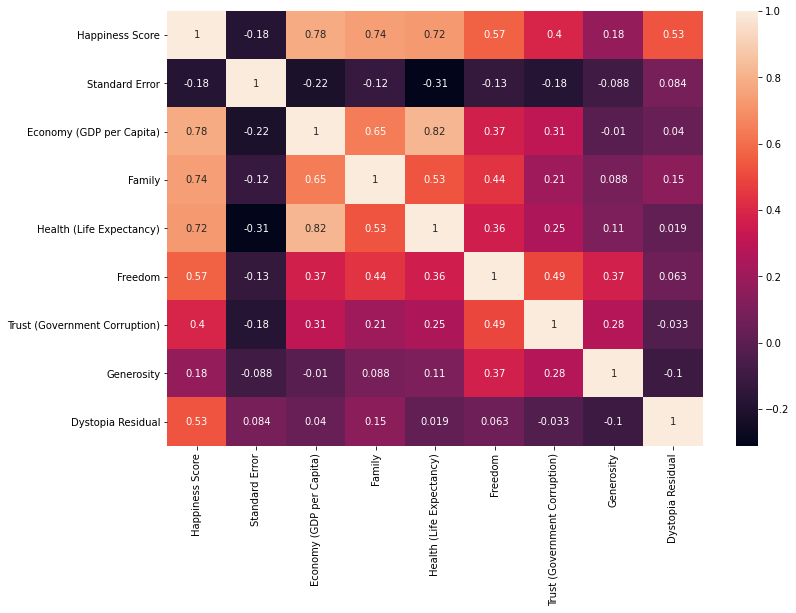

In [10]:
corr_mat = data.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_mat, annot=True)
plt.show()

from the above I can conclude that columns standard error, trust, generosity can be dropped (for good correlation >=+/- 0.5) 

In [11]:
data=data.drop(['Standard Error','Trust (Government Corruption)','Generosity'],axis=1)
data

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Dystopia Residual
0,7.587,1.39651,1.34951,0.94143,0.66557,2.51738
1,7.561,1.30232,1.40223,0.94784,0.62877,2.70201
2,7.527,1.32548,1.36058,0.87464,0.64938,2.49204
3,7.522,1.45900,1.33095,0.88521,0.66973,2.46531
4,7.427,1.32629,1.32261,0.90563,0.63297,2.45176
...,...,...,...,...,...,...
153,3.465,0.22208,0.77370,0.42864,0.59201,0.67042
154,3.340,0.28665,0.35386,0.31910,0.48450,1.63328
155,3.006,0.66320,0.47489,0.72193,0.15684,0.32858
156,2.905,0.01530,0.41587,0.22396,0.11850,1.83302


In [12]:
data.shape

(158, 6)

158 rows x 6 coloumns in dataset

In [13]:
print('Dataset contains any null values:',data.isnull().values.any())

Dataset contains any null values: False


##### Checking outliers

Happiness Score                AxesSubplot(0.125,0.536818;0.227941x0.343182)
Economy (GDP per Capita)    AxesSubplot(0.398529,0.536818;0.227941x0.343182)
Family                      AxesSubplot(0.672059,0.536818;0.227941x0.343182)
Health (Life Expectancy)          AxesSubplot(0.125,0.125;0.227941x0.343182)
Freedom                        AxesSubplot(0.398529,0.125;0.227941x0.343182)
Dystopia Residual              AxesSubplot(0.672059,0.125;0.227941x0.343182)
dtype: object

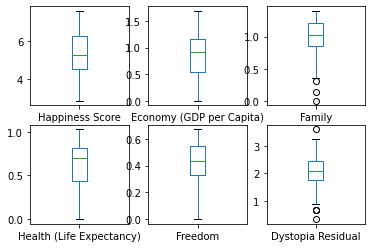

In [14]:
data.plot(kind='box',subplots=True,layout=(2,3))

Ouliers in family & dystopia residual column

#### Data Cleaning

In [15]:
data[data.apply(zscore)<=3].shape

(158, 6)

In [16]:
Q1 = data.quantile(q=.25)
Q3 = data.quantile(q=.75)
IQR = data.apply(stats.iqr)

#only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
data_clean = data[~((data < (Q1-1.5*IQR)) | (data > (Q3+1.5*IQR))).any(axis=1)]

#find how many rows are left in the dataframe 
data_clean.shape

(150, 6)

In [17]:
((158-150)/158)*100

5.063291139240507

data loss of 5%

Happiness Score                AxesSubplot(0.125,0.536818;0.227941x0.343182)
Economy (GDP per Capita)    AxesSubplot(0.398529,0.536818;0.227941x0.343182)
Family                      AxesSubplot(0.672059,0.536818;0.227941x0.343182)
Health (Life Expectancy)          AxesSubplot(0.125,0.125;0.227941x0.343182)
Freedom                        AxesSubplot(0.398529,0.125;0.227941x0.343182)
Dystopia Residual              AxesSubplot(0.672059,0.125;0.227941x0.343182)
dtype: object

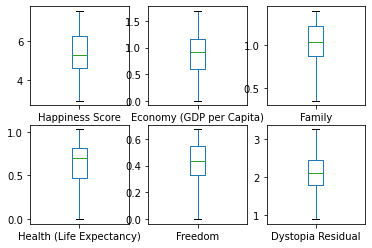

In [18]:
data_clean.plot(kind='box',subplots=True,layout=(2,3))

In [19]:
data_clean

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Dystopia Residual
0,7.587,1.39651,1.34951,0.94143,0.66557,2.51738
1,7.561,1.30232,1.40223,0.94784,0.62877,2.70201
2,7.527,1.32548,1.36058,0.87464,0.64938,2.49204
3,7.522,1.45900,1.33095,0.88521,0.66973,2.46531
4,7.427,1.32629,1.32261,0.90563,0.63297,2.45176
...,...,...,...,...,...,...
149,3.656,0.17417,0.46475,0.24009,0.37725,1.99172
150,3.655,0.46534,0.77115,0.15185,0.46866,1.41723
151,3.587,0.25812,0.85188,0.27125,0.39493,1.46494
154,3.340,0.28665,0.35386,0.31910,0.48450,1.63328


In [20]:
data_clean[data_clean['Economy (GDP per Capita)']==0.0]

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Dystopia Residual
119,4.517,0.0,1.0012,0.09806,0.22605,2.86712


In [21]:
data_clean[data_clean['Health (Life Expectancy)']==0.0]

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Dystopia Residual
122,4.507,0.33024,0.95571,0.0,0.4084,2.51009


In [22]:
data_clean[data_clean['Freedom']==0.0]

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Dystopia Residual
111,4.677,0.98549,0.81889,0.60237,0.0,1.95335


Freedom,Health (Life Expectancy),Economy (GDP per Capita) cannot be zero . so drop rows

In [23]:
data_clean=data_clean[data_clean['Freedom']!=0.0][data_clean['Health (Life Expectancy)']!=0.0][data_clean['Economy (GDP per Capita)']!=0.0]
data_clean

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Dystopia Residual
0,7.587,1.39651,1.34951,0.94143,0.66557,2.51738
1,7.561,1.30232,1.40223,0.94784,0.62877,2.70201
2,7.527,1.32548,1.36058,0.87464,0.64938,2.49204
3,7.522,1.45900,1.33095,0.88521,0.66973,2.46531
4,7.427,1.32629,1.32261,0.90563,0.63297,2.45176
...,...,...,...,...,...,...
149,3.656,0.17417,0.46475,0.24009,0.37725,1.99172
150,3.655,0.46534,0.77115,0.15185,0.46866,1.41723
151,3.587,0.25812,0.85188,0.27125,0.39493,1.46494
154,3.340,0.28665,0.35386,0.31910,0.48450,1.63328


check normal distribution

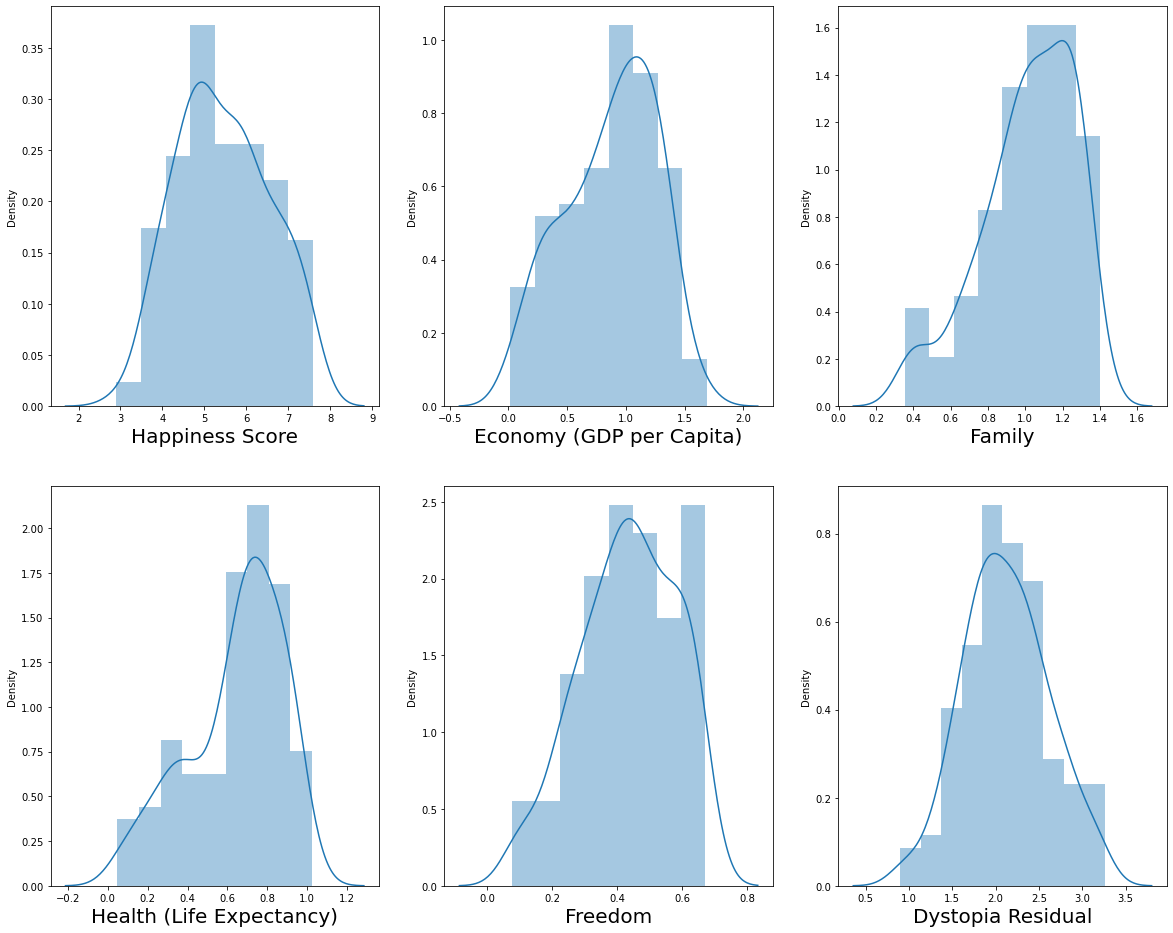

In [24]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in data_clean.columns:
    if plotnumber<=6:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data_clean[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

all columns are normally distributed

In [25]:
data_clean.corr()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Dystopia Residual
Happiness Score,1.000000,0.784805,0.733407,0.743451,0.598689,0.531512
Economy (GDP per Capita),0.784805,1.000000,0.642582,0.800096,0.387082,0.055531
Family,0.733407,0.642582,1.000000,0.521218,0.471509,0.140395
Health (Life Expectancy),0.743451,0.800096,0.521218,1.000000,0.374307,0.083539
Freedom,0.598689,0.387082,0.471509,0.374307,1.000000,0.083616
Dystopia Residual,0.531512,0.055531,0.140395,0.083539,0.083616,1.000000


In [26]:
y = data_clean[['Happiness Score']]
x = data_clean.drop(columns = ['Happiness Score'])

In [27]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [28]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1]) ]
vif["Features"] = x.columns
vif

,vif,Features
0,3.469284,Economy (GDP per Capita)
1,1.921741,Family
2,2.829444,Health (Life Expectancy)
3,1.324997,Freedom
4,1.026773,Dystopia Residual


No multicolinearity as all values are less 5 which is standard for determining multicolinearity

PCA

In [29]:
for i in range(2,6):
    pca = PCA(n_components=i)
    principalComponents = pca.fit_transform(X_scaled)
    print(i,sum(pca.explained_variance_ratio_))

2 0.7270075980127794
3 0.8733029615917841
4 0.9644325728784763
5 1.0000000000000002


chosed 4th from good data retention

In [30]:
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(x)

finding best random state

In [31]:
# To find the best random state using Decision Tree Regressor model
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=i)
    mod= DecisionTreeRegressor()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print ('best r2 score is',maxAccu,'on random state',maxRS)

best r2 score is 0.9127995088806176 on random state 49


In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=49)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(102, 5)
(45, 5)
(102, 1)
(45, 1)


102 row for training & 45 for testing

### Model building & Evaluation

In [33]:
# Linear Regression Model
lm=LinearRegression()
lm.fit(x_train,y_train)
lm.score(x_train,y_train)

0.9798303918506436

In [34]:
pred=lm.predict(x_test)
print('Coefficient of determination',r2_score(y_test,pred))
print('mean absolute error',mean_absolute_error(y_test,pred))
print('mean squarred error',mean_squared_error(y_test,pred))
print('Root mean square error',np.sqrt(mean_squared_error(y_test,pred)))

Coefficient of determination 0.9729004674429373
mean absolute error 0.14348023818846148
mean squarred error 0.035277035657734164
Root mean square error 0.1878218189075331


In [35]:
# Decision Tree Regression Model
dc=DecisionTreeRegressor()
dc.fit(x_train,y_train)
dc.score(x_train,y_train)

1.0

In [36]:
pred=dc.predict(x_test)
print('Coefficient of determination',r2_score(y_test,pred))
print('mean absolute error',mean_absolute_error(y_test,pred))
print('mean squarred error',mean_squared_error(y_test,pred))
print('Root mean square error',np.sqrt(mean_squared_error(y_test,pred)))

Coefficient of determination 0.8259960364803909
mean absolute error 0.3916
mean squarred error 0.2265110666666667
Root mean square error 0.47593178782958667


In [37]:
# KNeighbors Regression Model
kn=KNeighborsRegressor()
kn.fit(x_train,y_train)
kn.score(x_train,y_train)

0.9563410312684674

In [38]:
pred=kn.predict(x_test)
print('Coefficient of determination',r2_score(y_test,pred))
print('mean absolute error',mean_absolute_error(y_test,pred))
print('mean squarred error',mean_squared_error(y_test,pred))
print('Root mean square error',np.sqrt(mean_squared_error(y_test,pred)))

Coefficient of determination 0.9100067118120051
mean absolute error 0.26251111111111114
mean squarred error 0.11714949066666668
Root mean square error 0.3422710777536815


In [39]:
# Random Forest Regression Model
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
rf.score(x_train,y_train)

0.9887475894617689

In [40]:
pred=rf.predict(x_test)
print('Coefficient of determination',r2_score(y_test,pred))
print('mean absolute error',mean_absolute_error(y_test,pred))
print('mean squarred error',mean_squared_error(y_test,pred))
print('Root mean square error',np.sqrt(mean_squared_error(y_test,pred)))

Coefficient of determination 0.9301678565878051
mean absolute error 0.24526133333333375
mean squarred error 0.09090455741333364
Root mean square error 0.30150382653182634


based on R2 score and other evaluation parameter such as MAE, MSE,RMSE , Random forest regression is best mode

### HyperParamter tuning

In [41]:
parameter={'max_depth':np.arange(50,100),'criterion':['mse', 'mae']}

In [42]:
GCV=GridSearchCV(RandomForestRegressor(),parameter,cv=5)

In [43]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': array([50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,
       67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83,
       84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [44]:
GCV.best_params_

{'criterion': 'mae', 'max_depth': 84}

In [45]:
best_model=RandomForestRegressor(criterion='mae',max_depth=84)
best_model.fit(x_train,y_train)
best_model.score(x_train,y_train)

0.9880004550248449

In [46]:
pred=best_model.predict(x_test)
print('Coefficient of determination',r2_score(y_test,pred))
print('mean absolute error',mean_absolute_error(y_test,pred))
print('mean squarred error',mean_squared_error(y_test,pred))
print('Root mean square error',np.sqrt(mean_squared_error(y_test,pred)))

Coefficient of determination 0.9140739704711497
mean absolute error 0.27364822222222274
mean squarred error 0.11185490381555598
Root mean square error 0.3344471614703225


##### Saving model

In [47]:
joblib.dump(best_model,'Happiness_score.obj')

['Happiness_score.obj']